In [44]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df0 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/GPT_5_1/Matrix_Scores_GPT5_1_Administrative.csv").sort_values("ID")
df1 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/llama-3.3-70b-instruct/Matrix_Scores_llama-3.3-70b-instruct_Administrative.csv").sort_values("ID")
df2 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/qwen3-235b-a22b/Matrix_Scores_qwen3-235b-a22b_Administrative.csv").sort_values("ID")

lower_better = ["TTR", "LD", "WR", "MDD", "SI", "Cross", "WSF", "LIX", "Fog"]
higher_better = ["FRE"]

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import friedmanchisquare

# ----- Kendall's W function ----- # For measuring agreement
def kendalls_w(x, y, z):
    n = len(x)
    k = 3
    ranks = np.vstack([stats.rankdata(x), stats.rankdata(y), stats.rankdata(z)])
    R = np.sum(ranks, axis=0)
    S = np.sum((R - np.mean(R))**2)
    denom = (k**2 * (n**3 - n))
    return np.nan if denom == 0 else 12 * S / denom


# ----- Main function -----
def compare_models(df0, df1, df2, metric_type="Holistic"):
    """
    df0, df1, df2 : pandas DataFrames for GPT5.1, LLaMA, Qwen
    metric_type : "Holistic" or "Linguistic"
    """

    metrics = [c.replace(f"_{metric_type}", "") for c in df0.columns if c.endswith(f"_{metric_type}")]
    if not metrics:
        raise ValueError(f"No *_{metric_type} columns found.")

    wins_all = {"GPT5.1": 0, "LLaMA-3.3-70B": 0, "Qwen3-235B": 0}
    wins_significant = {"GPT5.1": 0, "LLaMA-3.3-70B": 0, "Qwen3-235B": 0}
    rows = []

    for metric in metrics:
        col = f"{metric}_{metric_type}"
        tmp = pd.DataFrame({
            'GPT5.1': df0[col].astype(float),
            'LLaMA-3.3-70B': df1[col].astype(float),
            'Qwen3-235B': df2[col].astype(float)
        }).dropna()

        if len(tmp) < 3:
            continue

        x = tmp['GPT5.1'].values
        y = tmp['LLaMA-3.3-70B'].values
        z = tmp['Qwen3-235B'].values

        # ---- Friedman Test ----
        stat, p_value = friedmanchisquare(x, y, z)

        # ---- Kendall's W ----
        W = kendalls_w(x, y, z)

        means = tmp.mean()

        # ---- Winner by direction ----
        if metric in lower_better:
            best_model = means.idxmin()
        elif metric in higher_better:
            best_model = means.idxmax()
        else:
            best_model = "Unknown"

        # Count wins
        if best_model in wins_all:
            wins_all[best_model] += 1
        is_significant = p_value < 0.05
        if is_significant and best_model in wins_significant:
            wins_significant[best_model] += 1

        rows.append({
            "Metric": metric,
            "n_admin": len(tmp),
            "Friedman_p": round(p_value, 6),
            "Kendalls_W": round(W, 4),
            "Significant_(p<0.05)": is_significant,
            "GPT5.1_mean": round(means["GPT5.1"], 3),
            "LLaMA_mean": round(means["LLaMA-3.3-70B"], 3),
            "Qwen_mean": round(means["Qwen3-235B"], 3),
            "Winner_by_direction": best_model
        })

    result_df = pd.DataFrame(rows)
    return result_df, wins_all, wins_significant


In [61]:
print("=======================ADMINISTRATIVE=======================\n\n")

print("--------------Holistic------------------\n")
holistic_df, holistic_wins_all, holistic_wins_sig = compare_models(df0, df1, df2, metric_type="Holistic")
print(holistic_df)

print("\n\n--------------Linguistic------------------")
# Linguistic metrics
linguistic_df, ling_wins_all, ling_wins_sig = compare_models(df0, df1, df2, metric_type="Linguistic")
print(linguistic_df)


=======================ADMINISTRATIVE=======================


--------------Holistic------------------

  Metric  n_admin  Friedman_p  Kendalls_W  Significant_(p<0.05)  GPT5.1_mean  \
0    TTR       30    0.000000      0.2664                  True        0.440   
1     LD       30    0.000000      0.3076                  True        0.562   
2     WR       30    0.000000      0.3620                  True        0.471   
3    MDD       30    0.001662      0.3855                  True        2.541   
4     SI       30    0.009590      0.2678                  True        0.235   
5  Cross       30    0.000000      0.3449                  True       13.067   
6    WSF       30    0.026428      0.4758                  True        3.956   
7    LIX       30    0.496585      0.3700                 False       39.266   
8    FRE       30    0.195278      0.5088                 False       61.927   
9    Fog       30    0.007202      0.4148                  True       10.582   

   LLaMA_mean 

In [56]:

# ---- LOAD YOUR THREE DATASETS ----
df0 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/GPT_5_1/Matrix_Scores_GPT5_1_ausgangstexte.csv").sort_values("ID")
df1 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/llama-3.3-70b-instruct/Matrix_Scores_llama-3.3-70b-instruct_Ausgangstexte.csv").sort_values("ID")
df2 = pd.read_csv("https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/qwen3-235b-a22b/Matrix_Scores_qwen3-235b-a22b_Ausgangstexte.csv").sort_values("ID")

print("=======================AUSGANGETEXTE=======================\n\n")

print("--------------Holistic------------------\n")
holistic_df, holistic_wins_all, holistic_wins_sig = compare_models(df0, df1, df2, metric_type="Holistic")
print(holistic_df)

print("\n\n--------------Linguistic------------------")
# Linguistic metrics
linguistic_df, ling_wins_all, ling_wins_sig = compare_models(df0, df1, df2, metric_type="Linguistic")
print(linguistic_df)


=======================AUSGANGETEXTE=======================


--------------Holistic------------------

  Metric  n_admin  Friedman_p  Kendalls_W  Significant_(p<0.05)  GPT5.1_mean  \
0    TTR       30    0.000000      0.2664                  True        0.440   
1     LD       30    0.000000      0.3076                  True        0.562   
2     WR       30    0.000000      0.3620                  True        0.471   
3    MDD       30    0.001662      0.3855                  True        2.541   
4     SI       30    0.009590      0.2678                  True        0.235   
5  Cross       30    0.000000      0.3449                  True       13.067   
6    WSF       30    0.026428      0.4758                  True        3.956   
7    LIX       30    0.496585      0.3700                 False       39.266   
8    FRE       30    0.195278      0.5088                 False       61.927   
9    Fog       30    0.007202      0.4148                  True       10.582   

   LLaMA_mean  

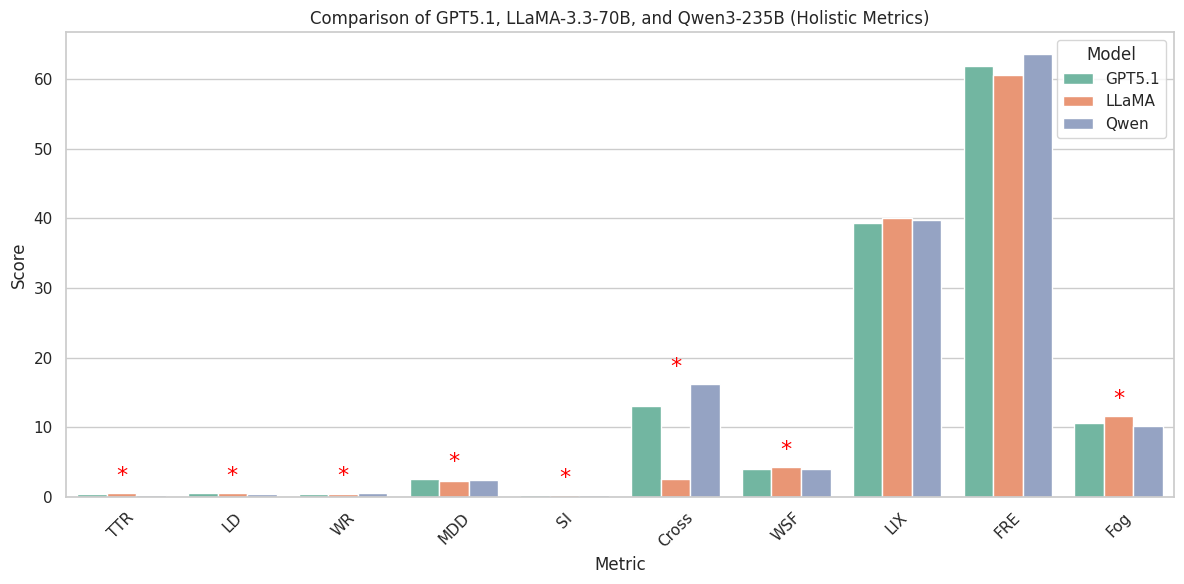

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Melt your DataFrame to long format for seaborn
df_long = holistic_df.melt(
    id_vars=["Metric", "Significant_(p<0.05)"],
    value_vars=["GPT5.1_mean", "LLaMA_mean", "Qwen_mean"],
    var_name="Model",
    value_name="Score"
)

# Clean model names
df_long["Model"] = df_long["Model"].str.replace("_mean", "")

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_long, x="Metric", y="Score", hue="Model", palette="Set2")

# Optional: mark significance
for i, row in holistic_df.iterrows():
    if row["Significant_(p<0.05)"]:
        plt.text(i, max(row["GPT5.1_mean"], row["LLaMA_mean"], row["Qwen_mean"]) + 1,
                 "*", ha='center', va='bottom', color='red', fontsize=16)

plt.title("Comparison of GPT5.1, LLaMA-3.3-70B, and Qwen3-235B (Holistic Metrics)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()
